# Semantic Web KEN3140 - Lab 1
## Resource Description Framework (RDF) and related concepts. 
Topics covered: 
- RDF as a data model
- RDF syntax
- Literals and Datatypes
- Reification and Named Graphs
- Shared Vocabularies
- Adding semantics - defining a vocabulary in Protege

---

## Design Principles for a Semantic Web:
1. Make structured and semi-structured data available in standardized formats --- use of **labeled graphs** as the data model for objects and their relations
2. Have the datasets and the individual data-elements and their relations accessible on the web --- use of **web identifiers** (Uniform Resource Identifiers - URI) to identify the individual data-items and their relations 
3. Describe the intended semantics of the data in a formalism --- use of **ontologies** (hierarchical vocabularies of types and relations) as the data model to formally represent the intended semantics of the data

## Language for Data Exchange: 
Any exchange language has 3 components: 
- a **data model** - tells us the  structure or organization of the data *(rdf)*
- a **semantics** - tells us how to interpret that data *(rdfs, owl)*
- a **syntax** - tells us how to write the data down *(turtle/jsonld etc.)*

---

## Resource Description Framework (RDF)

### What makes up the data model? Four concepts: 
### 1. Resources
The things we want to describe. Every resource has a URI (Uniform Resource Identifier) --- allows to unambiguously identify the things of interest. 
- **Frodo**: `<http://example.org/lotr/Frodo>`
- **Gandalf**: `<http://example.org/lotr/Gandalf>`
- **The One Ring**: `<http://example.org/lotr/OneRing>`

### 2. Properties 
A special kind of resource (and so also identified by URIs). Properties describe relationships between resources or between a resource and a value - for example "has a friend", "is the bearer of", or "is an enemy of"
- **hasFriend**: `<http://example.org/lotr/hasFriend>`
- **isBearerOf**: `<http://example.org/lotr/isBearerOf>`
- **isEnemyOf**: `<http://example.org/lotr/isEnemyOf>`

### 3. Statements 
Statements are RDF triples that assert a fact or relationship about resources. Consists of a subject, predicate (property), and object. 
1. Frodo is a friend of Gandalf.
     ```nt
     <http://example.org/lotr/Frodo> <http://example.org/lotr/hasFriend> <http://example.org/lotr/Gandalf> .
2. Frodo is the bearer of the One Ring.
     ```nt
     <http://example.org/lotr/Frodo> <http://example.org/lotr/isBearerOf> <http://example.org/lotr/OneRing> .
3. Gandalf is an enemy of Sauron.
     ```nt
     <http://example.org/lotr/Gandalf> <http://example.org/lotr/isEnemyOf> <http://example.org/lotr/Sauron> .

### 4. Graphs
An RDF Graph is a collection of RDF statements. Graphs can represent complex data with multiple interconnected statements.

```nt
<http://example.org/lotr/Frodo> <http://example.org/lotr/hasFriend> <http://example.org/lotr/Gandalf> .
<http://example.org/lotr/Frodo> <http://example.org/lotr/hasFriend> <http://example.org/lotr/Sam> .
<http://example.org/lotr/Frodo> <http://example.org/lotr/isBearerOf> <http://example.org/lotr/OneRing> .
<http://example.org/lotr/Gandalf> <http://example.org/lotr/isEnemyOf> <http://example.org/lotr/Sauron> .
<http://example.org/lotr/Sauron> <http://example.org/lotr/seeks> <http://example.org/lotr/OneRing> .
<http://example.org/lotr/OneRing> <http://example.org/lotr/wasCreatedBy> <http://example.org/lotr/Sauron> .
```

In a different (more readable) syntax: 
```nt
@prefix lotr: <http://example.org/lotr/> .

lotr:Frodo lotr:hasFriend lotr:Gandalf ;
            lotr:hasFriend lotr:Sam ;
            lotr:isBearerOf lotr:OneRing .

lotr:Gandalf lotr:isEnemyOf lotr:Sauron .

lotr:Sauron lotr:seeks lotr:OneRing .

lotr:OneRing lotr:wasCreatedBy lotr:Sauron .
```

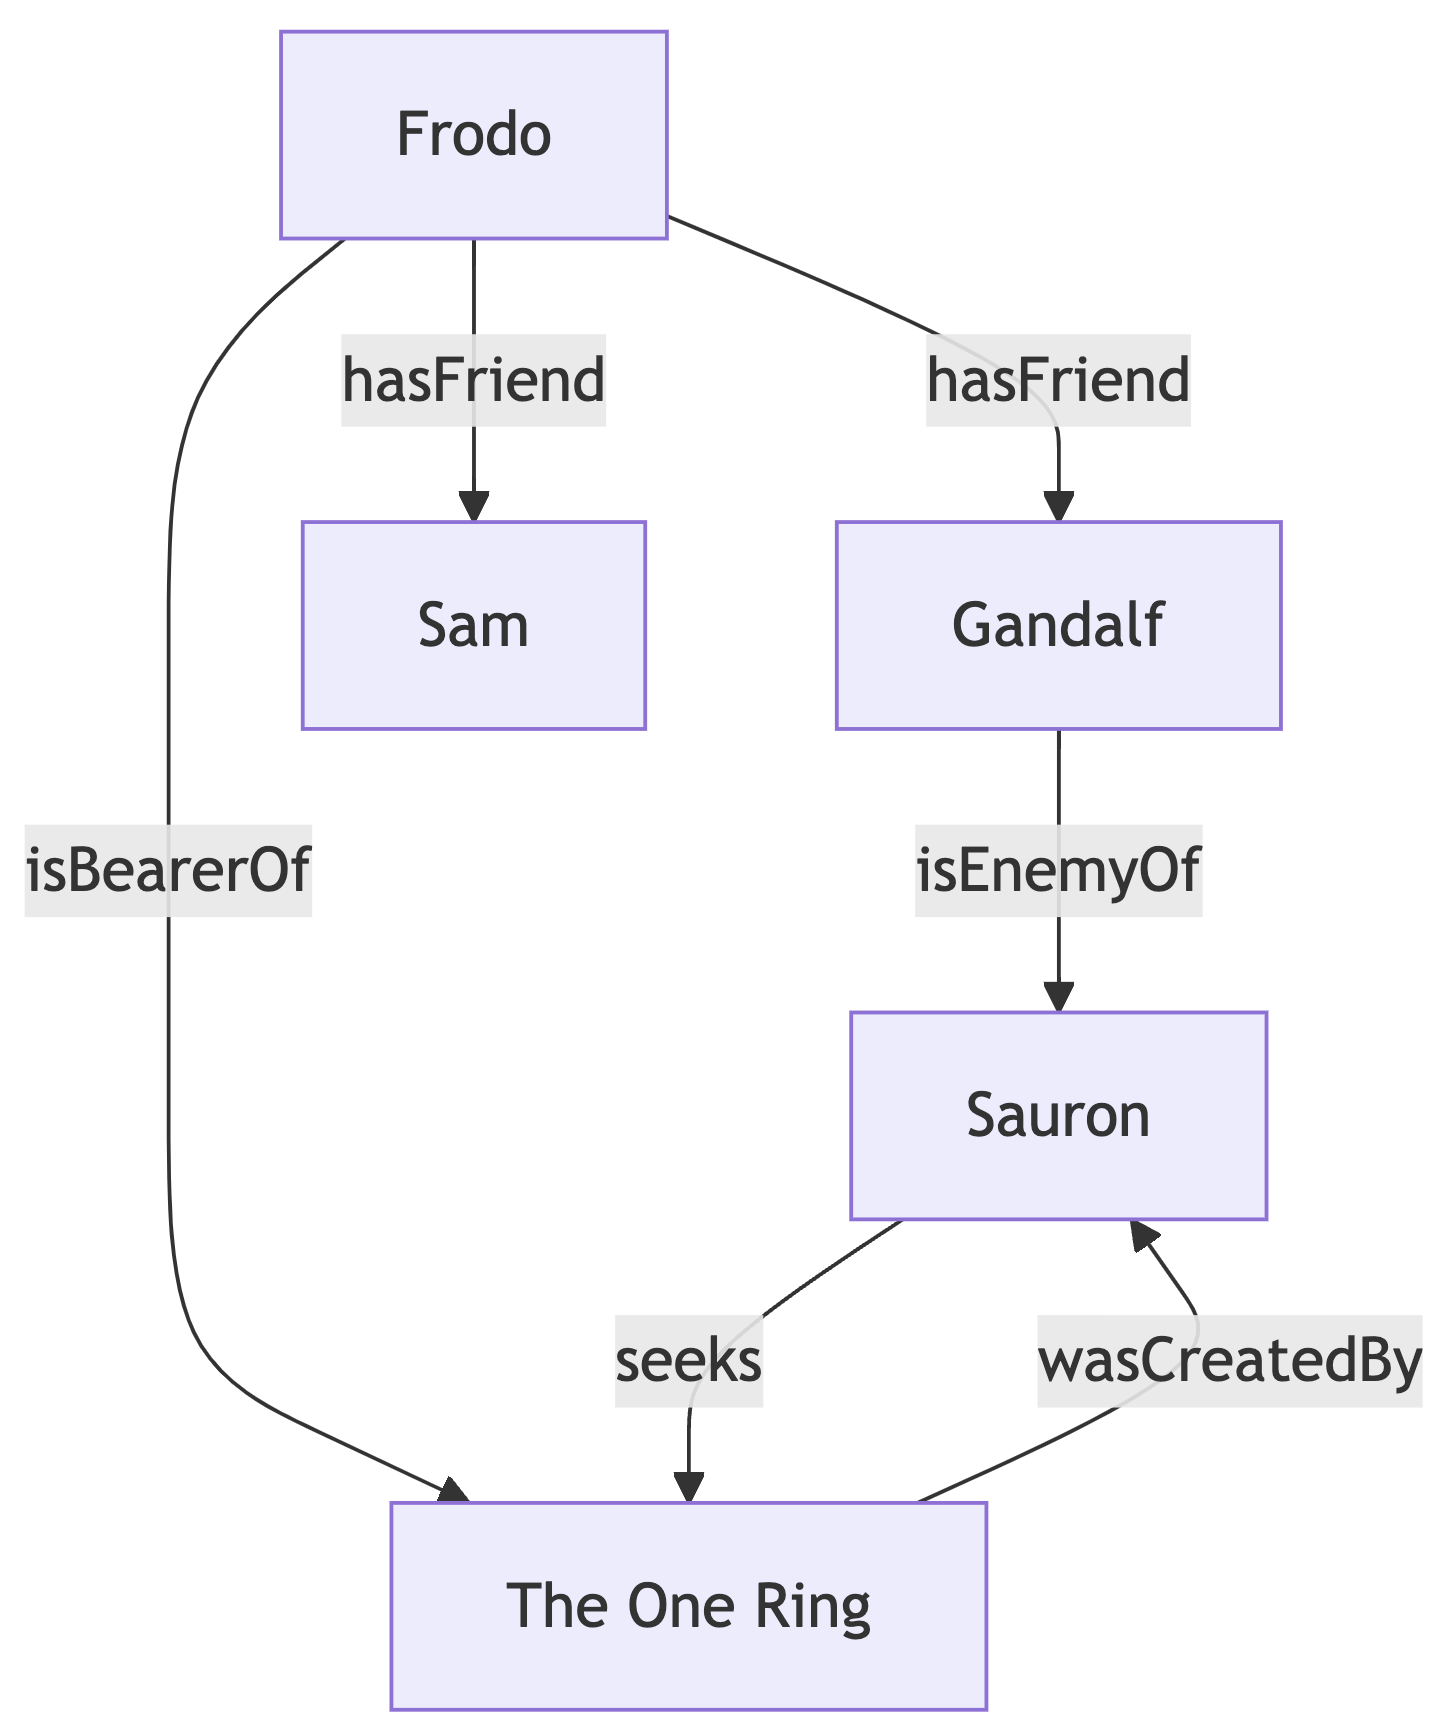

### RDF Syntaxes 
1. **Turtle** (https://www.w3.org/TR/rdf12-turtle/) -
Terse RDF Triple Language (Turtle) is a text-based syntax for RDF. The file extension used for Turtle text files is “.ttl”. RDF triples above are in turtle using prefixes.
```nt
    @prefix lotr: <http://example.org/lotr/> .
    lotr:Frodo lotr:hasFriend lotr:Gandalf ;
                lotr:hasFriend lotr:Sam ;
                lotr:isBearerOf lotr:OneRing .
```
2. **RDF/XML** (https://www.w3.org/TR/rdf-syntax-grammar/) - encoding of RDF in the XML language. Subjects are denoted by the rdf:about within an rdf:Description element (enclosed in brackets). Predicates and objects related to that subject are enclosed in the rdf:Description element. Namespaces can be used through the XML namespaces (xmlns:) construct. More verbose, difficult to read. 
```nt
    <?xml version="1.0"?>
    <rdf:RDF xmlns:lotr="http://example.org/lotr/"
             xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
    
      <rdf:Description rdf:about="http://example.org/lotr/Frodo">
        <lotr:hasFriend rdf:resource="http://example.org/lotr/Gandalf"/>
        <lotr:hasFriend rdf:resource="http://example.org/lotr/Sam"/>
        <lotr:isBearerOf rdf:resource="http://example.org/lotr/OneRing"/>
      </rdf:Description>
    
    </rdf:RDF>
```
3. **N-Triples** (https://www.w3.org/TR/n-triples/) - easy to parse line-based subset of Turtle.
```nt
    <http://example.org/lotr/Frodo> <http://example.org/lotr/hasFriend> <http://example.org/lotr/Gandalf> .
    <http://example.org/lotr/Frodo> <http://example.org/lotr/hasFriend> <http://example.org/lotr/Sam> .
    <http://example.org/lotr/Frodo> <http://example.org/lotr/isBearerOf> <http://example.org/lotr/OneRing> .
```
4. **JSON-LD** (https://www.w3.org/2018/jsonld-cg-reports/json-ld/) - JSON-based format to serialize Linked Data.
```nt
    {
      "@context": {
        "lotr": "http://example.org/lotr/"
      },
      "@id": "lotr:Frodo",
      "lotr:hasFriend": [
        {"@id": "lotr:Gandalf"},
        {"@id": "lotr:Sam"}
      ],
      "lotr:isBearerOf": {
        "@id": "lotr:OneRing"
      }
    }
```

---

### Literals and Datatypes
In the above examples objects have been resources themselves, but they can be *literals* as well. In Turtle this is written by enclosing the value in quotes and appending it with the *data type* of the value. A data type tells us whether we should interpret a value as string, a date, integer or some other type. Data types are again expressed as URLs. It is recommend practice to use the data types defined by XML Schema.
```nt
integers - "3"^^<http://www.w3.org/2001/XMLSchema#integer> 
decimals - "1.23"^^<http://www.w3.org/2001/XMLSchema#decimal> 
dates - "2024-09-04"^^<http://www.w3.org/2001/XMLSchema#date>
```

---

### Reification and Named Graphs
Sometimes it is useful to be able to point to particular statements and parts of graphs, such as when assigning a degree of belief in a statement or identifying where a statement has come from. 
1. **Reification** is used to make a statement about statements. It introduces an auxiliary object and relates it to the original statement through the *subject*, *predicate*, and *object* properties.
```nt
    @prefix lotr: <http://example.org/lotr/> .
    @prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
    @prefix ex: <http://example.org/> .
    
    # Original statement
    lotr:Frodo lotr:isBearerOf lotr:OneRing .
    
    # Reification of the statement
    _:stmt rdf:type rdf:Statement ;
           rdf:subject lotr:Frodo ;
           rdf:predicate lotr:isBearerOf ;
           rdf:object lotr:OneRing ;
           ex:assertedBy lotr:Elrond ;
           ex:assertedOn "3018-12-25"^^<http://www.w3.org/2001/XMLSchema#date> ;
           ex:assertedOn "25 December T.A. 3018"^^<http://www.w3.org/2001/XMLSchema#string> .
```
2. **Named Graphs** - we put brackets around the set of statements we want together and assign the set of statements a URI. Statements that are not part of a particular graph go in a set of brackets without a URI in front.

```nt
    @prefix lotr: <http://example.org/lotr/> .
    @prefix ex: <http://example.org/> .

    # Named Graph: "The One Ring"
    {
        ex:TheOneRing ex:assertedBy lotr:Elrond ;
                      ex:assertedOn "3018-12-25"^^<http://www.w3.org/2001/XMLSchema#date> . 
    }

    ex:TheOneRing {
        lotr:Frodo lotr:isBearerOf lotr:OneRing .
    }
```
---
```nt
    @prefix lotr: <http://example.org/lotr/> .
    @prefix ex: <http://example.org/> .

    # Named Graph: "Fellowship of the Ring"
    {
        ex:FellowshipOfTheRing ex:createdBy lotr:Elrond ;
                               ex:createdOn "3018-12-25"^^<http://www.w3.org/2001/XMLSchema#date> . 
    }
    ex:FellowshipOfTheRing {
        lotr:Frodo lotr:race lotr:Hobbit ;
                   lotr:role lotr:RingBearer ;
                   lotr:friendOf lotr:Sam, lotr:Gandalf .
    
        lotr:Sam lotr:race lotr:Hobbit ;
                 lotr:role lotr:Companion ;
                 lotr:friendOf lotr:Frodo .
    
        lotr:Gandalf lotr:race lotr:Maia ;
                     lotr:role lotr:Wizard ;
                     lotr:friendOf lotr:Frodo, lotr:Aragorn .
    
        lotr:Aragorn lotr:race lotr:Man ;
                     lotr:role lotr:Ranger ;
                     lotr:friendOf lotr:Gandalf, lotr:Legolas, lotr:Gimli .
    
        lotr:Legolas lotr:race lotr:Elf ;
                     lotr:role lotr:Archer ;
                     lotr:friendOf lotr:Aragorn, lotr:Gimli .
    
        lotr:Gimli lotr:race lotr:Dwarf ;
                   lotr:role lotr:Warrior ;
                   lotr:friendOf lotr:Legolas, lotr:Aragorn .
    
        lotr:Boromir lotr:race lotr:Man ;
                     lotr:role lotr:Warrior ;
                     lotr:friendOf lotr:Aragorn .
    
        lotr:Meriadoc lotr:race lotr:Hobbit ;
                      lotr:role lotr:Companion ;
                      lotr:friendOf lotr:Peregrin .
    
        lotr:Peregrin lotr:race lotr:Hobbit ;
                      lotr:role lotr:Companion ;
                      lotr:friendOf lotr:Meriadoc .
    }
```
Visualize using rdf-grapher - https://www.ldf.fi/service/rdf-grapher

---

### Shared Vocabularies
```nt
    @prefix lotr: <http://example.org/lotr/> .
    lotr:Frodo lotr:hasFriend lotr:Gandalf ;
                lotr:hasFriend lotr:Sam ;
                lotr:isBearerOf lotr:OneRing .
```
Self defined resources - ```http://example.org/lotr/Frodo``` or ```http://example.org/lotr/Gandalf```. 
This is isolated and can be ambiguous. For example, ```http://example.org/apple``` points to what? --> https://www.wikidata.org/wiki/Q89 or https://www.wikidata.org/wiki/Q312

---
```nt
    @prefix wiki: <https://www.wikidata.org/wiki/> .
    @prefix lotr: <http://example.org/lotr/> .
    wiki:Q177329 lotr:hasFriend wiki:Q177499 ;
                 lotr:hasFriend wiki:Q219473 ;
                 lotr:isBearerOf wiki:Q19852 .
```
Frodo - https://www.wikidata.org/wiki/Q177329  or https://dbpedia.org/page/Frodo_Baggins  
Gandalf - https://www.wikidata.org/wiki/Q177499 or https://dbpedia.org/page/Gandalf  
One Ring - https://www.wikidata.org/wiki/Q19852

---
```nt
    @prefix wiki: <https://www.wikidata.org/wiki/> .
    @prefix lotr: <http://example.org/lotr/> .
    @prefix schema: <https://schema.org/> .
    wiki:Q177329 schema:knows wiki:Q177499 ;
                 schema:knows wiki:Q219473 ;
                 lotr:isBearerOf wiki:Q19852 .
```

#### Building a conceptual model with some concepts and properties 
| Subject Class | Property        | Object Class |
|---------------|-----------------|--------------|
| Product       | hasName         | String       |
| Product       | hasReview       | Review       |
| Review        | hasAuthor       | Person       |
| Review        | hasRating       | Rating       |
| Review        | hasReviewBody   | String       |
| Rating        | hasRatingValue  | Integer      |

Use the above to search schema.org (https://schema.org/) for suitable types and properties. 

#### What you find should look something like this. 
Some concepts and properties with shared vocabulary from schema.org (https://schema.org/)

| Subject Class   | Property               | Object Class      |
|-----------------|------------------------|-------------------|
| `schema:Product`| `schema:name`          | `xsd:string`      |
| `schema:Product`| `schema:review`        | `schema:Review`   |
| `schema:Review` | `schema:author`        | `schema:Person`   |
| `schema:Review` | `schema:reviewRating`  | `schema:Rating`   |
| `schema:Review` | `schema:reviewBody`    | `xsd:string`      |
| `schema:Rating` | `schema:ratingValue`   | `xsd:integer`     |

### Adding Semantics
#### Classes 
For most of the lab (except the most recent exercise on building a model with schema.org) we have been loooking at individual objects (Frodo, Gandalf, OneRing etc.). But we also want to define the **type** of these objects. This is done with **classes**. A class is a set of things, all individuals that belong to it are instances of this class. Therefore, Frodo is perhaps an instance of a *Hobbit* and Gandalf an instance of a *Wizard*. Both can be an instance of a class *FictionalCharacters*. RDF provides a property to connect instances to their class, it is ```rdf:type```.  
From the previous exercise, if we use the classes and properties from below -  
| Subject Class   | Property               | Object Class      |
|-----------------|------------------------|-------------------|
| `schema:Product`| `schema:name`          | `xsd:string`      |
| `schema:Product`| `schema:review`        | `schema:Review`   |  

we get instances of the kind
```nt
ex:LaptopModelX rdf:type schema:Product ;
    schema:name "MacBook Air 13" ;
    schema:review ex:Review1 .

ex:Review1 a schema:Review ;
    schema:author ex:Ben ;
    schema:reviewRating ex:Rating1 ;
    schema:reviewBody "Slim and sleek with great battery life. Mid level performance." .
    
ex:Rating1 a schema:Rating ;
    schema:ratingValue "5"^^xsd:integer .
```


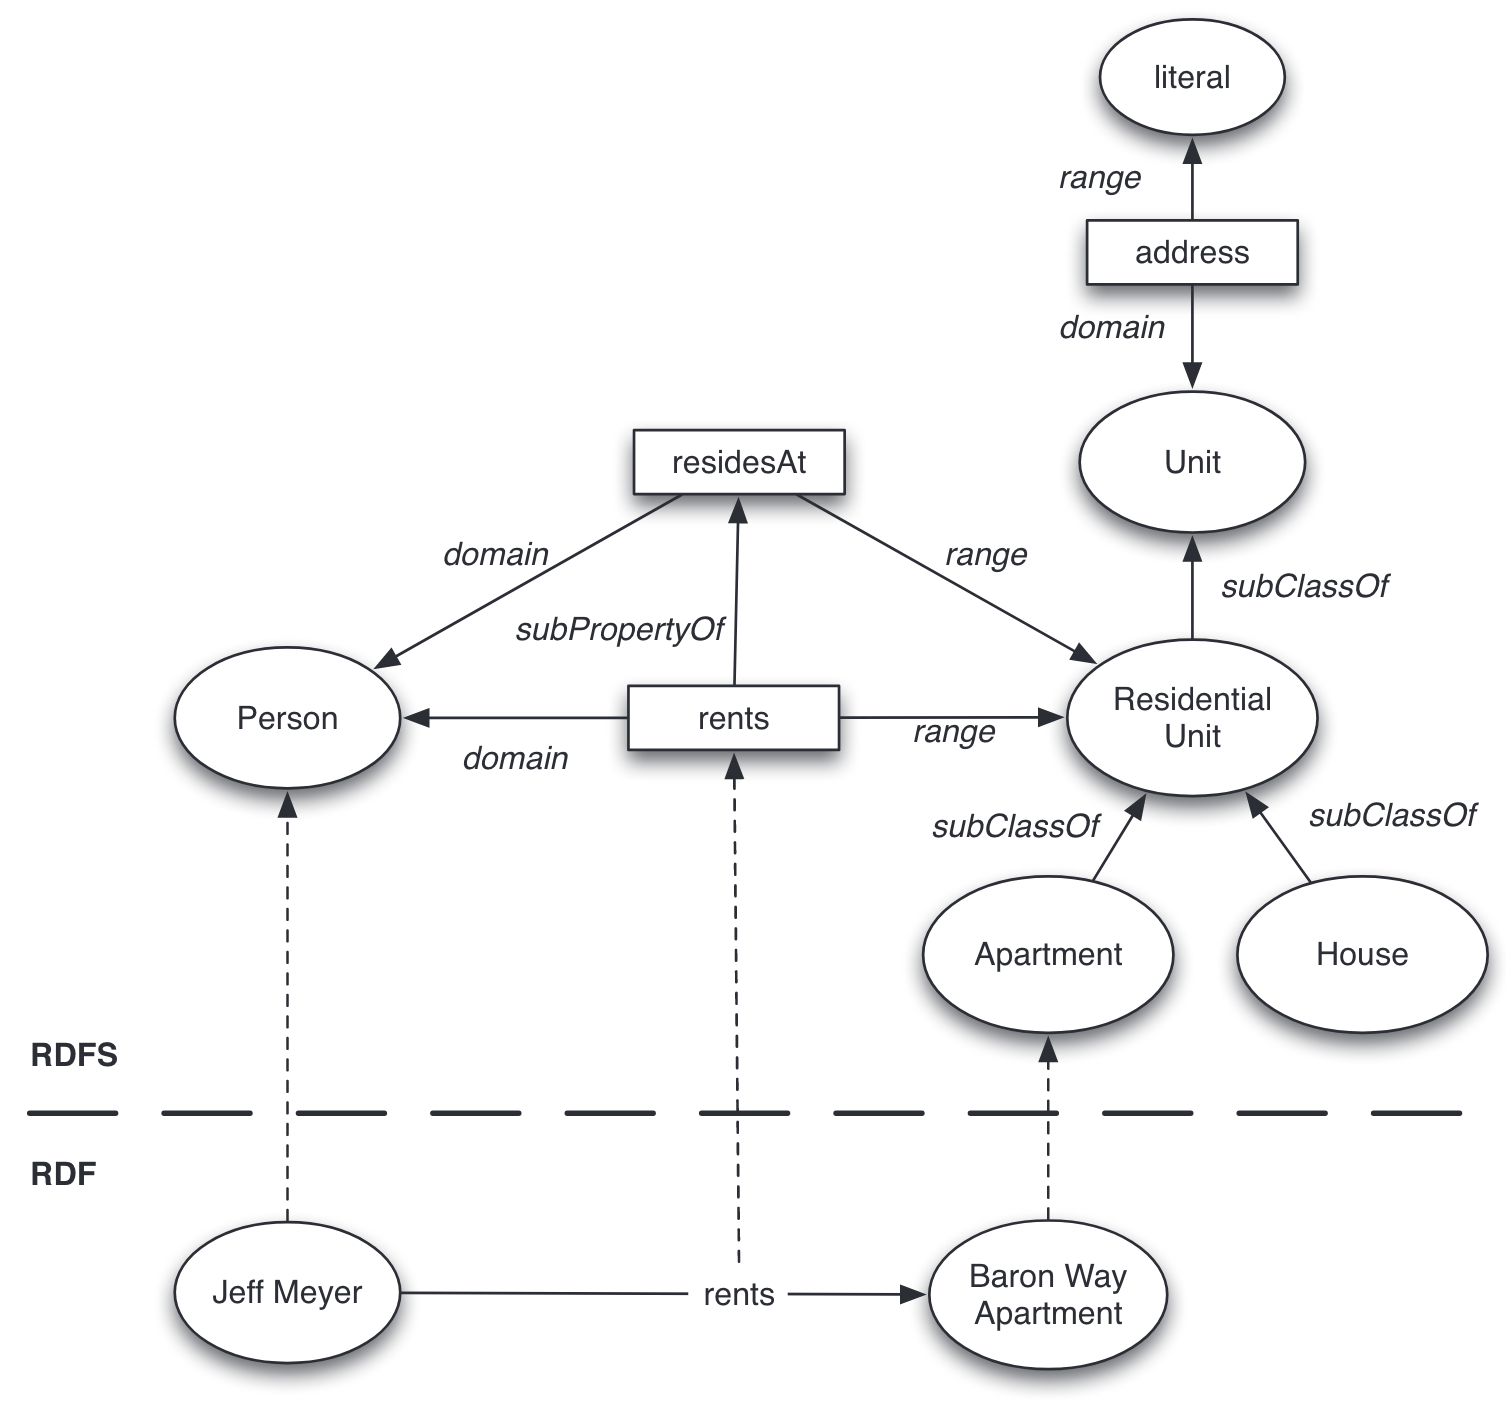
```nt
Credit: Grigoris Antoniou, Paul Groth, Frank van van Harmelen, and Rinke Hoekstra. 2012. A Semantic Web Primer. The MIT Press. 
```

#### Class and Property Hierarchies 
Classes are also connected to each other. We see this in the diagram with the ```rdfs:subClassOf``` relation. If *X* is a subclass of *Y*, then every instance of *X* is an instance of *Y*. Similarly for properties, with ```rdfs:subPropertyOf```. *rents* is a ```rdfs:subPropertyOf``` of *residesAt*, which is to say if *rents(Person1, ResidentialUnit1)* is the case, then by default *residesAt(Person1, ResidentialUnit1)* is also the case. The inverse need not be the case. A person for example might have bought the place, or lives with their parents.  

#### Restrictions on Properties - Domain and Range 
```rdfs:domain``` specifies the domain of a property and states that any resource that has a given property is an instance of the domain classes.  
```rdfs:range``` specifies the range of a property and states that the values of a property are instances of the range classes.  

| Subject Class   | Property               | Object Class      |
|-----------------|------------------------|-------------------|
| `schema:Product`| `schema:name`          | `xsd:string`      |
| `schema:Product`| `schema:review`        | `schema:Review`   |
| `schema:Review` | `schema:author`        | `schema:Person`   |  

```nt
:Product a rdfs:Class .
:Review a rdfs:Class .
:Person a rdfs:Class .

:hasName a rdf:Property ;
    rdfs:domain :Product ;
    rdfs:range rdfs:Literal .

:hasReview a rdf:Property ;
    rdfs:domain :Product ;
    rdfs:range :Review .

:hasAuthor a rdf:Property ;
    rdfs:domain :Review ;
    rdfs:range :Person .
```

We now put the idea of defining classes, properties, class and property hierarchies, inheritance, and setting domain and range in action using Protege.  

1. Installing Protege - https://protege.stanford.edu/software.php#desktop-protege  
2. Visulaize the resulting vocabulary - WebVOWL - https://service.tib.eu/webvowl/

#### Classes: 
1. Person
2. Unit
3. Residential Unit
4. Apartment
5. House
#### Object Property 
1. residesAt
2. rents
#### Datatype Property 
1. address

We will now add these in Protege. 

1. Window > tabs > [Classes, Object Properties, Data properties]
2. Add classes as parents, children, or siblings based on the hierarchy in the diagram.
3. Add object properties with the given hierarchy.
4. Add domain and range for the property.
   - Go the Object properties. Click on residesAt. On the right panel (Description: residesAt), click on Domain > Class hierarchy > Person. Similarly for range. 
5. Add datatype property (address) and then define its domain (In Description: address > Domain > Class hierarchy > Unit). Range for the datatype property is a literal, again click on Range > Built in datatypes > rdfs:Literal .
6. Define another property *residenceOf* as a sibling of *residesAt* and define it as inverse of *residesAt*. 

With this we have defined the schema (RDFS part of the diagram).  
Next we look at class instances and object-property assertion. For this:
1. Go to the *Individuals by class* tab.
2. Click on the *Person* class.
3. Look at the sub-window *Direct instances*. Click on *Add individual* and add *JeffMeyer* as an instances of the Person class. Similarly for *BaronWayApartment* as an instance of the class *Apartment*.
4. Finally, we need to assert that *JeffMeyer* indeed rents *BaronWayApartment*. For click on *JeffMeyer* in the sub-window *Direct instances*. Go the sub-window Property assertions: JeffMeyer, and click on *Object property assertions*. Enter object property name *rents* and individual name *BaronWayApartment*.

At this point, for the instance *JeffMeyer* we can see that *JeffMeyer* rents *BaronWayApartment*. We know that we defined *rents* as a subProperty of *residesAt*. Go the *Reasoner* tab in the top menu bar. Select HermiT, and click on *start reasoner*. Now check the *Object property assertions* for *JeffMeyer* again. 